Name : Biyon Fernando

Index number : 190178J

Text(0.5, 1.0, 'Transformed')

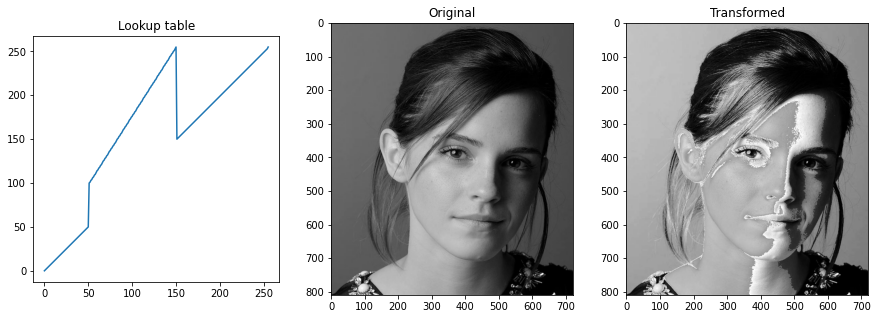

In [12]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'emma_gray.jpg')
assert img is not None

l1 = np.linspace(0,50,51)
l2 = np.linspace(100,255,100)
l3 = np.linspace(150,255,105)

lt = np.concatenate((l1,l2,l3), axis = 0).astype(np.uint8)

img2 = cv.LUT(img, lt)

fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].plot(lt)
ax[0].set_aspect('equal')
ax[0].set_title('Lookup table')
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title('Original')
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title('Transformed')

Text(0.5, 1.0, 'Lookup table')

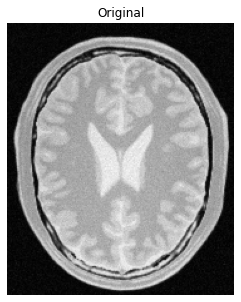

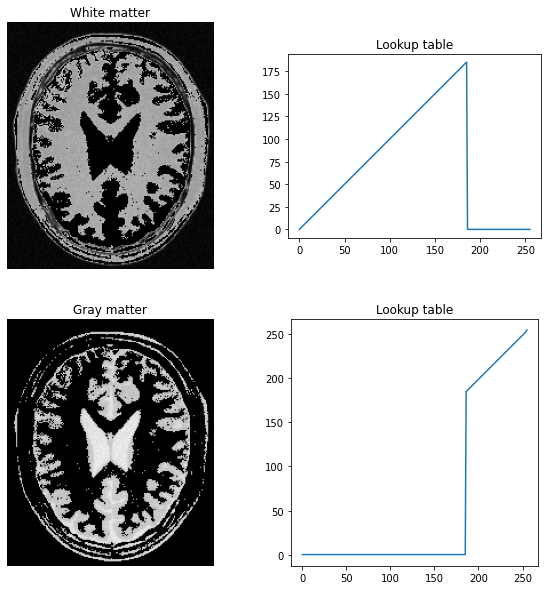

In [37]:
img = cv.imread(r'brain_proton_density_slice.png')
assert img is not None


treshold = 185
l1 = np.zeros(treshold+1)
l2 = np.linspace(treshold,255,255-treshold)


lt1 = np.concatenate((l1,l2), axis = 0).astype(np.uint8)

l3 = np.linspace(0,treshold, treshold+1)
l4 = np.zeros(255-treshold)

lt2 = np.concatenate((l3,l4), axis = 0).astype(np.uint8)

img2 = cv.LUT(img, lt1)

img3 = cv.LUT(img, lt2)

fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax.set_title('Original')
ax.axis("off")


fig1, ax1 = plt.subplots(2,2,figsize = (10,10))

ax1[0][0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
ax1[0][0].set_title('White matter')
ax1[0][0].axis("off")

ax1[0][1].plot(lt2)
ax1[0][1].set_aspect('equal')
ax1[0][1].set_title('Lookup table')

ax1[1][0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax1[1][0].set_title('Gray matter')
ax1[1][0].axis("off")

ax1[1][1].plot(lt1)
ax1[1][1].set_aspect('equal')
ax1[1][1].set_title('Lookup table')


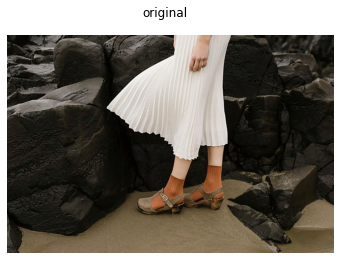

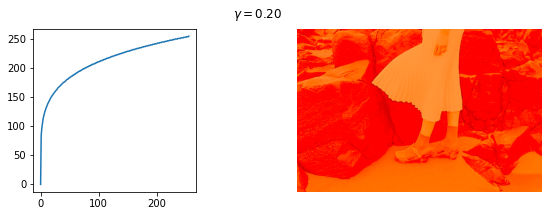

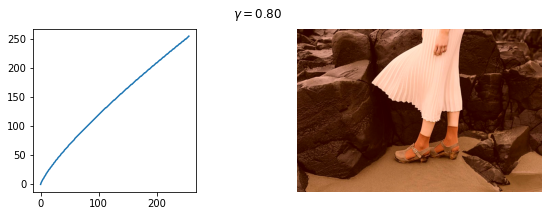

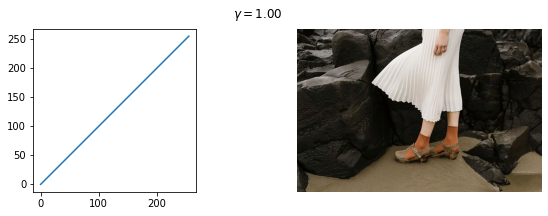

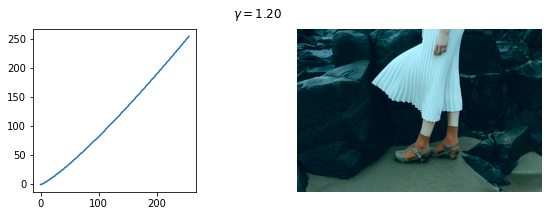

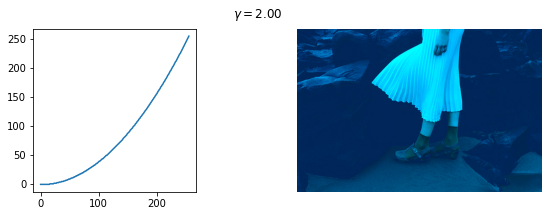

In [55]:
img0 = cv.imread(r'highlights_and_shadows.jpg')
assert img0 is not None


img1 = cv.cvtColor(img0, cv.COLOR_BGR2Lab)

L = img[:,:,0]
a = img[:,:,1]
b = img[:,:,2]




fig, ax = plt.subplots()
fig.suptitle('original')
ax.imshow(cv.cvtColor(img1, cv.COLOR_Lab2RGB))
ax.axis('off')

Glist = [0.2, 0.8, 1, 1.2, 2]

for gamma in Glist:

    lt = np.array([(i/255)**gamma*255 for i in range(0,256)]).astype(np.uint8)

    img2 = cv.LUT(img1, lt)

    fig, ax = plt.subplots(1,2,figsize = (10,3))
    fig.suptitle('$ \gamma = %.2f$'%gamma)
    ax[0].plot(lt)
    ax[0].set_aspect('equal')
    ax[1].imshow(cv.cvtColor(img2, cv.COLOR_Lab2RGB))
    ax[1].axis('off')